818
818


<IPython.core.display.Javascript object>


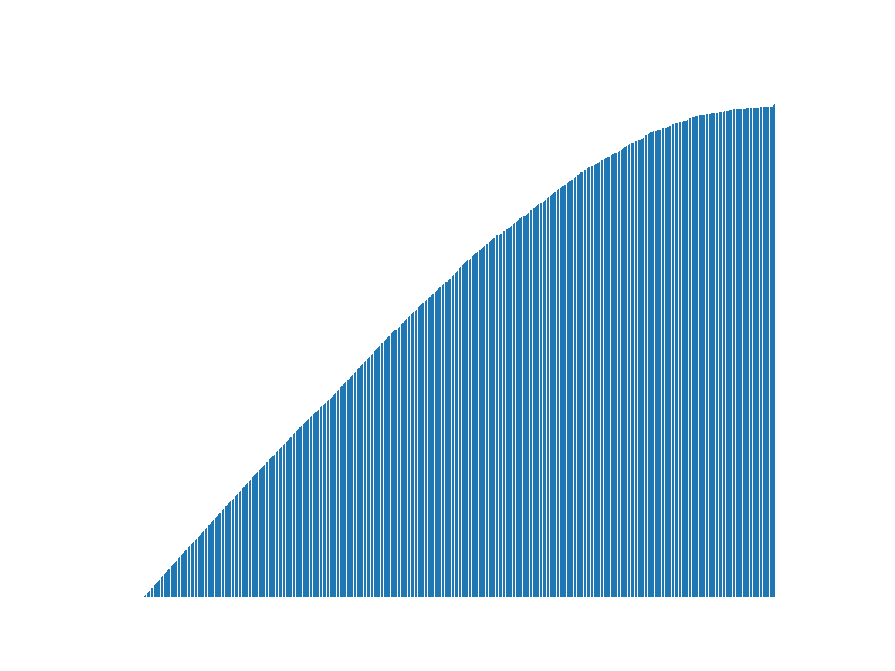

Text(0.5, 1.0, 'Qty Sold per Menu Item')

In [8]:
%matplotlib notebook

import numpy as np
import tensorflow as tf
import csv
import matplotlib.pyplot as plt

train_path = 'data/f2018.csv'

#Read CSV into list of lists
with open(train_path, 'r') as f:
    data = list(csv.reader(f, delimiter=','))
    #print(data[:3])
data_np = np.array(data)

#Convert last col (Qty Sold) to int data type
for item in data[1:]:       #start iterating from 2nd row in order to leave Qty Sold as string
    item[-1] = int(item[-1])
#print(data[:3]) #print first three rows

#Collect unique Major Groups, Family groups and menu item names
#Use set to get unique, list for list format
major_groups = list(set(data_np[1:-1:, 2]))
family_groups = list(set(data_np[1:-1, 1]))
menu_items = list(set(data_np[1:-1, 0]))
qty_sold = data_np[1:-1, 3]
#print('major groups\n', major_groups)
#print('family groups\n', family_groups)
#print('menu items\n', menu_items)

print(len(data_np[1:-1,0]))
print(len(qty_sold))

#idx_menu = np.arange(len(data_np[1:-1,0]))
#plt.bar(idx_menu, qty_sold)
#plt.xlabel('Menu Items', fontsize=20)
#plt.ylabel('Qty Sold', fontsize=20)
#plt.xticks(idx_menu, data_np[1:-1,0],fontsize=20, rotation=30)
#plt.title('Qty Sold per Menu Item', fontsize=40)
#plt.show()
